<a href="https://colab.research.google.com/github/rsanch12/ECGR-4105-FALL_2025/blob/HW2/HW2_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv")
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories','parking']]
y = df['price']
display(X.head())
display(y.head())

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X_scaled[:5])

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  2.67940935],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  1.51769249]])

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (436, 5)
Shape of X_val: (109, 5)
Shape of y_train: (436,)
Shape of y_val: (109,)


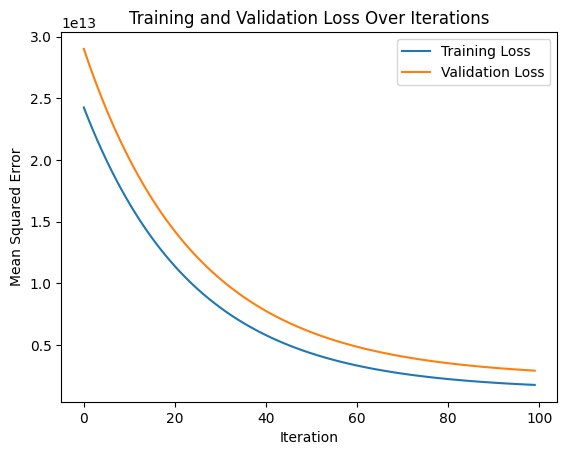

In [64]:
import numpy as np
import matplotlib.pyplot as plt

n_features = X_train.shape[1]
theta = np.random.randn(n_features + 1, 1)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

learning_rate = 0.01
n_iterations = 100

train_losses = []
val_losses = []

m = len(X_train)

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)

    theta -= learning_rate * gradients

    # Calculate training loss
    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))
    val_losses.append(val_loss)

# Plot  training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [65]:
final_val_loss = val_losses[-1]
print(f"Final Validation Loss (Mean Squared Error): {final_val_loss}")

Final Validation Loss (Mean Squared Error): 2929684873650.581


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)
display(X_normalized[:5])

array([[0.39656357, 0.6       , 0.33333333, 0.66666667, 0.66666667],
       [0.5024055 , 0.6       , 1.        , 1.        , 1.        ],
       [0.57113402, 0.4       , 0.33333333, 0.33333333, 0.66666667],
       [0.40206186, 0.6       , 0.33333333, 0.33333333, 1.        ],
       [0.39656357, 0.6       , 0.        , 0.33333333, 0.66666667]])

In [67]:
X_train_normalized, X_val_normalized, y_train_normalized, y_val_normalized = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

n_features_normalized = X_train_normalized.shape[1]
theta_normalized = np.random.randn(n_features_normalized + 1, 1)

X_b_train_normalized = np.c_[np.ones((len(X_train_normalized), 1)), X_train_normalized]
X_b_val_normalized = np.c_[np.ones((len(X_val_normalized), 1)), X_val_normalized]

y_train_normalized = y_train_normalized.values.reshape(-1, 1)
y_val_normalized = y_val_normalized.values.reshape(-1, 1)

train_losses_normalized = []
val_losses_normalized = []

m_normalized = len(X_train_normalized)

for iteration in range(n_iterations):
    gradients_normalized = 2/m_normalized * X_b_train_normalized.T.dot(X_b_train_normalized.dot(theta_normalized) - y_train_normalized)

    theta_normalized -= learning_rate * gradients_normalized

    train_loss_normalized = (1/m_normalized) * np.sum(np.square(X_b_train_normalized.dot(theta_normalized) - y_train_normalized))
    train_losses_normalized.append(train_loss_normalized)

    val_loss_normalized = (1/len(X_val_normalized)) * np.sum(np.square(X_b_val_normalized.dot(theta_normalized) - y_val_normalized))
    val_losses_normalized.append(val_loss_normalized)

print("Training with normalized features complete.")

Training with normalized features complete.


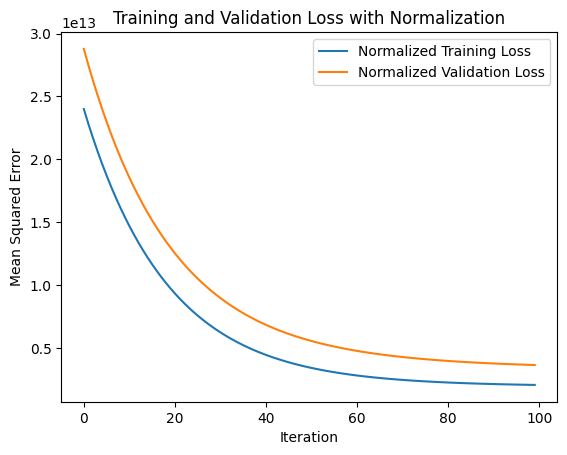

In [68]:
plt.plot(train_losses_normalized, label="Normalized Training Loss")
plt.plot(val_losses_normalized, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss with Normalization")
plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X)
display(X_scaled_standard[:5])

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  2.67940935],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  1.51769249]])

In [70]:
X_train_standard, X_val_standard, y_train_standard, y_val_standard = train_test_split(X_scaled_standard, y, test_size=0.2, random_state=42)

n_features_standard = X_train_standard.shape[1]
theta_standard = np.random.randn(n_features_standard + 1, 1)

X_b_train_standard = np.c_[np.ones((len(X_train_standard), 1)), X_train_standard]
X_b_val_standard = np.c_[np.ones((len(X_val_standard), 1)), X_val_standard]

y_train_standard = y_train_standard.values.reshape(-1, 1)
y_val_standard = y_val_standard.values.reshape(-1, 1)

train_losses_standard = []
val_losses_standard = []

m_standard = len(X_train_standard)

for iteration in range(n_iterations):
    gradients_standard = 2/m_standard * X_b_train_standard.T.dot(X_b_train_standard.dot(theta_standard) - y_train_standard)

    theta_standard -= learning_rate * gradients_standard

    train_loss_standard = (1/m_standard) * np.sum(np.square(X_b_train_standard.dot(theta_standard) - y_train_standard))
    train_losses_standard.append(train_loss_standard)

    val_loss_standard = (1/len(X_val_standard)) * np.sum(np.square(X_b_val_standard.dot(theta_standard) - y_val_standard))
    val_losses_standard.append(val_loss_standard)

print("Training with standardized features complete.")

Training with standardized features complete.


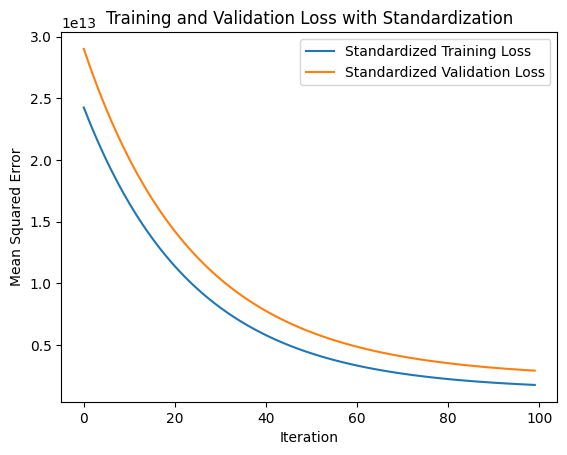

In [71]:
plt.plot(train_losses_standard, label="Standardized Training Loss")
plt.plot(val_losses_standard, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss with Standardization")
plt.show()

In [72]:
final_val_loss_normalized = val_losses_normalized[-1]
final_val_loss_standard = val_losses_standard[-1]

print(f"Final Validation Loss (Baseline): {final_val_loss}")
print(f"Final Validation Loss (Normalization): {final_val_loss_normalized}")
print(f"Final Validation Loss (Standardization): {final_val_loss_standard}")

if final_val_loss < final_val_loss_normalized and final_val_loss < final_val_loss_standard:
    best_approach = "Baseline"
    lowest_loss = final_val_loss
elif final_val_loss_normalized < final_val_loss and final_val_loss_normalized < final_val_loss_standard:
    best_approach = "Normalization"
    lowest_loss = final_val_loss_normalized
else:
    best_approach = "Standardization"
    lowest_loss = final_val_loss_standard

print(f"\nThe {best_approach} best training accuracy with a final validation loss of is {lowest_loss}")

Final Validation Loss (Baseline): 2929684873650.581
Final Validation Loss (Normalization): 3632144821371.99
Final Validation Loss (Standardization): 2929684697971.9487

The Standardization best training accuracy with a final validation loss of is 2929684697971.9487


import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv")
display(df.head())

In [73]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = df['price']
display(X.head())
display(y.head())

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,yes,no,no,no,yes,2,yes
1,8960,4,4,4,yes,no,no,no,yes,3,no
2,9960,3,2,2,yes,no,yes,no,no,2,yes
3,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,7420,4,1,2,yes,yes,yes,no,yes,2,no


,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [74]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_scaled = pipeline.fit_transform(X)
display(X_scaled[:5])

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  2.67940935,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (436, 17)
Shape of X_val: (109, 17)
Shape of y_train: (436,)
Shape of y_val: (109,)


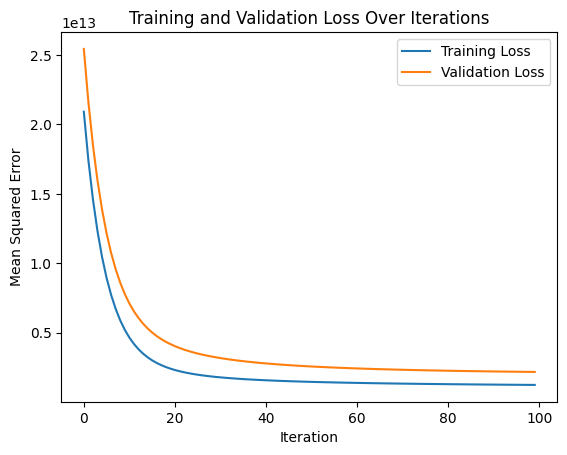

In [76]:
import numpy as np
import matplotlib.pyplot as plt

n_features = X_train.shape[1]
theta = np.random.randn(n_features + 1, 1)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

y_train = y_train.values.reshape(-1, 1)
y_val = y_val.values.reshape(-1, 1)

learning_rate = 0.01
n_iterations = 100

train_losses = []
val_losses = []

m = len(X_train)

# Gradient Descent loop
for iteration in range(n_iterations):
    # Calculate gradients
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)

    # Update theta
    theta -= learning_rate * gradients

    # Calculate training loss
    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    train_losses.append(train_loss)

    # Calculate validation loss
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))
    val_losses.append(val_loss)

# Plot  training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [77]:
final_val_loss = val_losses[-1]
print(f"Final Validation Loss (Mean Squared Error): {final_val_loss}")

Final Validation Loss (Mean Squared Error): 2161255716449.082


In [78]:
print("Learned Parameters:")
print(f"Intercept: {theta[0][0]}")

feature_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i in range(len(feature_names)):
    print(f"{feature_names[i]} Coefficient: {theta[i+1][0]}")

Learned Parameters:
Intercept: 1042156.0224317277
area Coefficient: 540307.4096353828
bedrooms Coefficient: 210943.16498754293
bathrooms Coefficient: 509337.51391297457
stories Coefficient: 347212.72500250675
parking Coefficient: 273318.5435879261


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (436, 11)
Shape of X_val: (109, 11)
Shape of y_train: (436,)
Shape of y_val: (109,)


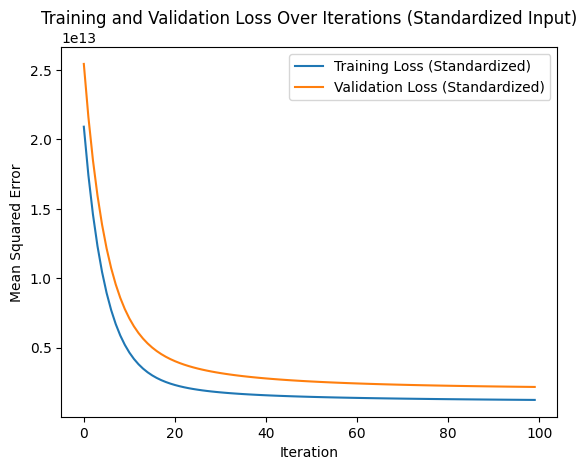

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Apply the preprocessing and scaling using the previously defined pipeline
X_train_scaled = pipeline.transform(X_train)
X_val_scaled = pipeline.transform(X_val)

# Add a column of ones to the standardized training and validation data
X_b_train_scaled = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_b_val_scaled = np.c_[np.ones((len(X_val_scaled), 1)), X_val_scaled]

# Reshape y_train and y_val to be column vectors
y_train_reshaped = y_train.values.reshape(-1, 1)
y_val_reshaped = y_val.values.reshape(-1, 1)

# Initialize model parameters (theta)
n_features_scaled = X_train_scaled.shape[1]
theta_scaled = np.random.randn(n_features_scaled + 1, 1)

# Define learning rate and number of iterations
learning_rate = 0.01
n_iterations = 100

# Initialize lists to store losses
train_losses_scaled = []
val_losses_scaled = []

# Get the number of training examples
m_scaled = len(X_train_scaled)

# Gradient Descent loop
for iteration in range(n_iterations):
    # Calculate gradients
    gradients_scaled = 2/m_scaled * X_b_train_scaled.T.dot(X_b_train_scaled.dot(theta_scaled) - y_train_reshaped)

    # Update theta
    theta_scaled -= learning_rate * gradients_scaled

    # Calculate training loss (Mean Squared Error)
    train_loss_scaled = (1/m_scaled) * np.sum(np.square(X_b_train_scaled.dot(theta_scaled) - y_train_reshaped))
    train_losses_scaled.append(train_loss_scaled)

    # Calculate validation loss (Mean Squared Error)
    val_loss_scaled = (1/len(X_val_scaled)) * np.sum(np.square(X_b_val_scaled.dot(theta_scaled) - y_val_reshaped))
    val_losses_scaled.append(val_loss_scaled)

# Plot the training and validation loss
plt.plot(train_losses_scaled, label="Training Loss (Standardized)")
plt.plot(val_losses_scaled, label="Validation Loss (Standardized)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Standardized Input)")
plt.show()

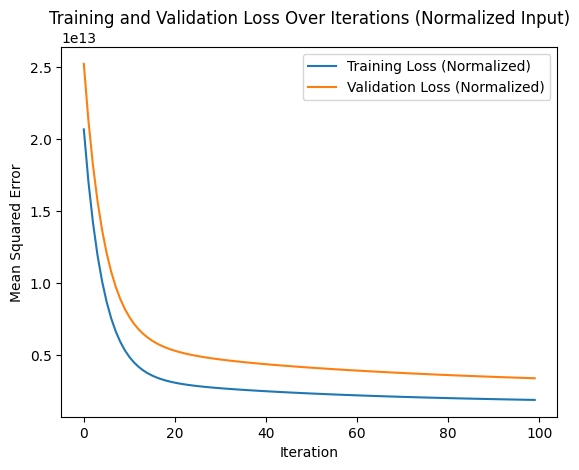

In [81]:
from sklearn.preprocessing import MinMaxScaler

# Create transformers for numerical and categorical features
numerical_transformer_norm = MinMaxScaler()
categorical_transformer_norm = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor_norm = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_norm, numerical_features),
        ('cat', categorical_transformer_norm, categorical_features)])

# Create a pipeline that first preprocesses the data and then normalizes it
pipeline_norm = Pipeline(steps=[('preprocessor', preprocessor_norm)])

# Apply the preprocessing and normalization
X_train_normalized = pipeline_norm.fit_transform(X_train)
X_val_normalized = pipeline_norm.transform(X_val)

# Add a column of ones to the normalized training and validation data
X_b_train_normalized = np.c_[np.ones((len(X_train_normalized), 1)), X_train_normalized]
X_b_val_normalized = np.c_[np.ones((len(X_val_normalized), 1)), X_val_normalized]

# Reshape y_train and y_val to be column vectors if they are not already.
# Based on previous code, y_train and y_val are already reshaped, so we can use y_train_reshaped and y_val_reshaped.
# If they were not reshaped, we would do:
# y_train_reshaped = y_train.values.reshape(-1, 1)
# y_val_reshaped = y_val.values.reshape(-1, 1)


# Initialize model parameters (theta)
n_features_normalized = X_train_normalized.shape[1]
theta_normalized = np.random.randn(n_features_normalized + 1, 1)

# Define learning rate and number of iterations
learning_rate = 0.01
n_iterations = 100

# Initialize lists to store losses
train_losses_normalized = []
val_losses_normalized = []

# Get the number of training examples
m_normalized = len(X_train_normalized)

# Gradient Descent loop
for iteration in range(n_iterations):
    # Calculate gradients
    gradients_normalized = 2/m_normalized * X_b_train_normalized.T.dot(X_b_train_normalized.dot(theta_normalized) - y_train_reshaped)

    # Update theta
    theta_normalized -= learning_rate * gradients_normalized

    # Calculate training loss (Mean Squared Error)
    train_loss_normalized = (1/m_normalized) * np.sum(np.square(X_b_train_normalized.dot(theta_normalized) - y_train_reshaped))
    train_losses_normalized.append(train_loss_normalized)

    # Calculate validation loss (Mean Squared Error)
    val_loss_normalized = (1/len(X_val_normalized)) * np.sum(np.square(X_b_val_normalized.dot(theta_normalized) - y_val_reshaped))
    val_losses_normalized.append(val_loss_normalized)

# Plot the training and validation loss
plt.plot(train_losses_normalized, label="Training Loss (Normalized)")
plt.plot(val_losses_normalized, label="Validation Loss (Normalized)")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations (Normalized Input)")
plt.show()

In [82]:
# Calculate final losses for standardized model
final_train_loss_scaled = train_losses_scaled[-1]
final_val_loss_scaled = val_losses_scaled[-1]

# Calculate final losses for normalized model
final_train_loss_normalized = train_losses_normalized[-1]
final_val_loss_normalized = val_losses_normalized[-1]

# Recall baseline final validation loss
final_val_loss_baseline = final_val_loss # This variable was printed in a previous cell

print("--- Final Losses ---")
print(f"Baseline Model:")
print(f"  Final Validation Loss (MSE): {final_val_loss_baseline}")
print("\nStandardized Input Model:")
print(f"  Final Training Loss (MSE): {final_train_loss_scaled}")
print(f"  Final Validation Loss (MSE): {final_val_loss_scaled}")
print("\nNormalized Input Model:")
print(f"  Final Training Loss (MSE): {final_train_loss_normalized}")
print(f"  Final Validation Loss (MSE): {final_val_loss_normalized}")

print("\n--- Comparison of Validation Losses ---")
if final_val_loss_scaled < final_val_loss_baseline and final_val_loss_scaled < final_val_loss_normalized:
    print("The standardized input model achieved the lowest validation loss.")
elif final_val_loss_normalized < final_val_loss_baseline and final_val_loss_normalized < final_val_loss_scaled:
    print("The normalized input model achieved the lowest validation loss.")
else:
    print("The baseline model achieved the lowest validation loss or there is no significant difference.")

print("\n--- Potential Reasons for Performance Differences ---")
print("Standardization (centering the data around 0 with a standard deviation of 1) and normalization (scaling data to a fixed range, usually 0 to 1) can significantly impact the performance of gradient descent.")
print("Scaling the features can help gradient descent converge faster and more reliably by preventing features with larger magnitudes from dominating the gradient updates.")
print("Differences in performance between standardization and normalization might depend on the specific dataset and the distribution of its features. Standardization is often preferred when the data has outliers, while normalization can be useful when the features have different scales and no strong outliers.")
print("The baseline model, without any scaling, likely struggled with features on different scales, leading to a less efficient and potentially less effective gradient descent.")

--- Final Losses ---
Baseline Model:
  Final Validation Loss (MSE): 2161255716449.082

Standardized Input Model:
  Final Training Loss (MSE): 1225868675776.6138
  Final Validation Loss (MSE): 2161255048883.23

Normalized Input Model:
  Final Training Loss (MSE): 1848079162856.8157
  Final Validation Loss (MSE): 3355411365691.4536

--- Comparison of Validation Losses ---
The standardized input model achieved the lowest validation loss.

--- Potential Reasons for Performance Differences ---
Standardization (centering the data around 0 with a standard deviation of 1) and normalization (scaling data to a fixed range, usually 0 to 1) can significantly impact the performance of gradient descent.
Scaling the features can help gradient descent converge faster and more reliably by preventing features with larger magnitudes from dominating the gradient updates.
Differences in performance between standardization and normalization might depend on the specific dataset and the distribution of its fe